# Capstone 3: Trend Forecasting

## EDA

In [78]:
!pip install python-docx

In [1]:
# Import packages
# get os
import docx
import os
os.getcwd()

'C:\\Users\\yuvem'

In [2]:
os.chdir('C:\\Users\\yuvem\\OneDrive\\Documents\\GitHub\\Cap3_prac')

In [3]:
os.getcwd()

'C:\\Users\\yuvem\\OneDrive\\Documents\\GitHub\\Cap3_prac'

In [4]:
doc = docx.Document('description_fashiondata.docx')
doc.paragraphs[0].text

'Fashion Conversation Data on Instagram'

In [5]:
!pip install dask

In [6]:
# Import packages
from dask import dataframe as dd
import pandas as pd
import time 

start = time.time()
fashion_df = pd.read_csv('fashion data on Instagram.csv')
end = time.time()
print("Read csv with dask: ",(end-start),"sec")

C:\Users\yuvem\anaconda3\lib\site-packages\dask\config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\yuvem\anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read csv with dask:  0.3350849151611328 sec


### Load data

In [7]:
fashion_df.head()

,UserId,Followings,Followers,MediaCount,BrandName,BrandCategory,Hashtags,Caption,ImgURL,Likes,...,NumberOfPeople,NumberOfFashionProduct,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise
0,1171579752855683619_212070047,518.0,9840.0,541,abercrombie,High street,"beautiful, summer, fashion, love, cute, food, ...","We were born to be REAL, not to be perfect. ...",https://scontent.cdninstagram.com/t51.2885-15/...,97,...,0.931486,3.42211,0.083862,0.015089,0.000583,0.000026,0.000017,0.890586,0.009657,0.000181
1,1171594777274371222_176762322,7333.0,2300.0,272,abercrombie,High street,"teen, model, brunette, selfie, hollister, snap...","Gotta run, but first, let me take selfie. Me...",https://scontent.cdninstagram.com/t51.2885-15/...,94,...,0.466329,2.91971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,91,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,94,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1171508187966229230_2797323089,132.0,456.0,56,abercrombie,High street,"abercrombieandfitch, shopping, love, hollister...",#love #shopping #shoppen #hollister #abercro...,https://scontent.cdninstagram.com/t51.2885-15/...,9,...,0.393063,1.45586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Clean data

In [8]:
fashion_df.isnull().sum()

UserId                      0
Followings                  0
Followers                   0
MediaCount                  0
BrandName                   0
BrandCategory               0
Hashtags                  146
Caption                    35
ImgURL                      0
Likes                       0
Comments                    0
CreationTime                0
Link                        0
Selfie                      0
BodySnap                    0
Marketing                   0
ProductOnly                 0
NonFashion                  0
Face                        0
Logo                        0
BrandLogo                   0
Smile                       0
Outdoor                     0
NumberOfPeople              0
NumberOfFashionProduct      0
Anger                       0
Contempt                    0
Disgust                     0
Fear                        0
Happiness                   0
Neutral                     0
Sadness                     0
Surprise                    0
dtype: int

In [9]:
fashion_df.dtypes

UserId                     object
Followings                float64
Followers                 float64
MediaCount                  int64
BrandName                  object
BrandCategory              object
Hashtags                   object
Caption                    object
ImgURL                     object
Likes                       int64
Comments                    int64
CreationTime                int64
Link                       object
Selfie                    float64
BodySnap                  float64
Marketing                 float64
ProductOnly               float64
NonFashion                float64
Face                      float64
Logo                      float64
BrandLogo                 float64
Smile                     float64
Outdoor                   float64
NumberOfPeople            float64
NumberOfFashionProduct    float64
Anger                     float64
Contempt                  float64
Disgust                   float64
Fear                      float64
Happiness     

In [10]:
# Convert to string type
fashion_df['Hashtags'] = fashion_df['Hashtags'].astype(pd.StringDtype())
fashion_df['Caption'] = fashion_df['Caption'].astype(pd.StringDtype())

In [11]:
fashion_df.dtypes

UserId                     object
Followings                float64
Followers                 float64
MediaCount                  int64
BrandName                  object
BrandCategory              object
Hashtags                   string
Caption                    string
ImgURL                     object
Likes                       int64
Comments                    int64
CreationTime                int64
Link                       object
Selfie                    float64
BodySnap                  float64
Marketing                 float64
ProductOnly               float64
NonFashion                float64
Face                      float64
Logo                      float64
BrandLogo                 float64
Smile                     float64
Outdoor                   float64
NumberOfPeople            float64
NumberOfFashionProduct    float64
Anger                     float64
Contempt                  float64
Disgust                   float64
Fear                      float64
Happiness     

In [12]:
fashion_df['Caption'].unique() # Check

<StringArray>
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [13]:
fashion_df['Hashtags'].unique() # Check

<StringArray>
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     'beautiful, summer, fashion, love, cute, food, likeforfollow, tbt, igers, japan, girl, instagood, instagramhub, instamood, swag, tflers, instadaily, followforfollow, followme, tagsforlikes, amazing, likeforlike, f4f, igdaily, abercrombie, tweegram, picoftheday, photooftheday',
                                                                                                                                                              

In [14]:
# All columns with float types
import numpy as np

df_num = fashion_df.select_dtypes(include=[np.float])

In [15]:
print(df_num)

       Followings  Followers    Selfie  BodySnap  Marketing  ProductOnly  \
0           518.0     9840.0  0.000885  0.336438   0.741220     0.009454   
1          7333.0     2300.0  0.003912  0.995503   0.001728     0.002125   
2           131.0      605.0  0.015774  0.963880   0.025719     0.027023   
3           131.0      605.0  0.015774  0.963880   0.025719     0.027023   
4           132.0      456.0  0.002021  0.014188   0.028351     0.418125   
...           ...        ...       ...       ...        ...          ...   
24747       459.0     3236.0  0.000248  0.002351   0.010261     0.993830   
24748       209.0     2563.0  0.000732  0.021389   0.003330     0.925944   
24749       209.0     8737.0  0.000898  0.071716   0.057724     0.879977   
24750       209.0     8737.0  0.000898  0.071716   0.057724     0.879977   
24751       209.0     2563.0  0.000090  0.001835   0.000276     0.996433   

       NonFashion      Face      Logo  BrandLogo  ...  NumberOfPeople  \
0        0.001

In [16]:
# All columns with string or object type
df_notnum = fashion_df.select_dtypes(exclude=[np.number])
print(df_notnum)

                               UserId    BrandName BrandCategory  \
0       1171579752855683619_212070047  abercrombie   High street   
1       1171594777274371222_176762322  abercrombie   High street   
2       1171407552643586413_581125501  abercrombie   High street   
3       1171407552643586413_581125501  abercrombie   High street   
4      1171508187966229230_2797323089  abercrombie   High street   
...                               ...          ...           ...   
24747   1171575731978099465_389885373         zara   High street   
24748   1171566570370586806_253427645         zara   High street   
24749  1171566525099211846_1433754542         zara   High street   
24750  1171566525099211846_1433754542         zara   High street   
24751   1171565778125281443_253427645         zara   High street   

                                                Hashtags  \
0      beautiful, summer, fashion, love, cute, food, ...   
1      teen, model, brunette, selfie, hollister, snap...   
2  

In [17]:
fashion_df['Hashtags'].dtype

string[python]

#### Cleaning 'Hashtag' and 'Caption' columns

In [27]:
# Eliminate nulls
fashion_df = fashion_df[fashion_df['clean_hashtags'].notna()]
fashion_df = fashion_df[fashion_df['clean_hashtags'] != 'NA']
fashion_df = fashion_df[fashion_df['clean_caption'].notna()]
fashion_df = fashion_df[fashion_df['clean_caption'] != 'NA']

In [28]:
fashion_df.isnull().sum()

UserId                      0
Followings                  0
Followers                   0
MediaCount                  0
BrandName                   0
BrandCategory               0
Hashtags                  146
Caption                    35
ImgURL                      0
Likes                       0
Comments                    0
CreationTime                0
Link                        0
Selfie                      0
BodySnap                    0
Marketing                   0
ProductOnly                 0
NonFashion                  0
Face                        0
Logo                        0
BrandLogo                   0
Smile                       0
Outdoor                     0
NumberOfPeople              0
NumberOfFashionProduct      0
Anger                       0
Contempt                    0
Disgust                     0
Fear                        0
Happiness                   0
Neutral                     0
Sadness                     0
Surprise                    0
clean_hash

In [29]:
fashion_df['clean_hashtags'] = fashion_df.clean_hashtags.replace(value='', regex=r'\b[a-z]{1,3}\b') 

In [30]:
fashion_df['clean_caption'] = fashion_df.clean_caption.replace(value='', regex=r'\b[a-z]{1,3}\b') 

In [31]:
fashion_df_clean = fashion_df.drop(fashion_df.columns[[0,6,7,8,12]], axis=1)
fashion_df_clean.head()

,Followings,Followers,MediaCount,BrandName,BrandCategory,Likes,Comments,CreationTime,Selfie,BodySnap,...,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise,clean_hashtags,clean_caption
0,518.0,9840.0,541,abercrombie,High street,97,0,1453883211,0.000885,0.336438,...,0.083862,0.015089,0.000583,0.000026,0.000017,0.890586,0.009657,0.000181,beautiful summer fashion love cute food ...,We were born REAL perfect Abercrombi...
1,7333.0,2300.0,272,abercrombie,High street,94,0,1453885002,0.003912,0.995503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,teen model brunette selfie hollister snap...,Gotta first take selfie Message ma...
2,131.0,605.0,106,abercrombie,High street,91,3,1453862683,0.015774,0.963880,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,alexandani cute llbean beanboots anthropol...,dress impress U
3,131.0,605.0,106,abercrombie,High street,94,3,1453862683,0.015774,0.963880,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,alexandani cute llbean beanboots anthropol...,dress impress U
4,132.0,456.0,56,abercrombie,High street,9,1,1453874680,0.002021,0.014188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,abercrombieandfitch shopping love hollister...,love shopping shoppen hollister abercro...


In [45]:
#fashion_df_clean.columns
fashion_df_clean['BrandLogo'].unique()

array([0.292843 , 0.063139 , 0.0376345, ..., 0.0474441, 0.0714272,
       0.0251096])

In [ ]:
# Fill null values in the following columns with their mean: infected_by'and 'contact_number'
#from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#X = fashion_df_clean[['MediaCount', 'Likes','Comments',]]
#imputer.fit(X)

In [ ]:
#df[['infected_by', 'contact_number']] = imputer.transform(X)

In [32]:
hashtags_caption_subset = fashion_df_clean[['clean_hashtags','clean_caption']]
hashtags_caption_subset.head()

,clean_hashtags,clean_caption
0,beautiful summer fashion love cute food ...,We were born REAL perfect Abercrombi...
1,teen model brunette selfie hollister snap...,Gotta first take selfie Message ma...
2,alexandani cute llbean beanboots anthropol...,dress impress U
3,alexandani cute llbean beanboots anthropol...,dress impress U
4,abercrombieandfitch shopping love hollister...,love shopping shoppen hollister abercro...


In [33]:
hashtags_caption_subset.clean_hashtags.unique()

array(['beautiful  summer  fashion  love  cute  food  likeforfollow    igers  japan  girl  instagood  instagramhub  instamood  swag  tflers  instadaily  followforfollow  followme  tagsforlikes  amazing  likeforlike     igdaily  abercrombie  tweegram  picoftheday  photooftheday',
       'teen  model  brunette  selfie  hollister  snapchat  malemodel  onpoint  goodnight  idgaf  hashtag    whatsgood    snapme  followforfollow  instaguy  daily    blueeyes  hipster         black  abercrombie  male  tuesday    teenmodel',
       'alexandani  cute  llbean  beanboots  anthropologie  herringbonevest  preppygirl  lillypulitzer  thatpreppygirl  preppystyle  etsy  monogram  lululemon  jewelry  pearls  jcrew  armcandy  preppy  katespade  abercrombie  toryburch',
       ...,
       '                 cute                   love                        zara            handmead                                                     accessories                                        fashion                  

In [34]:
hashtags_caption_subset.clean_caption.unique()

array(['  We were born   REAL     perfect   Abercrombie  instadaily  love  instagood  summer     instagramhub    likeforfollow  cute  likeforlike  photooftheday  igdaily  instamood  followme  picoftheday  igers  girl  tweegram  beautiful  TagsForLikes    japan  followforfollow  food  swag  amazing  TFLers  fashion ',
       '  Gotta    first    take selfie  Message    male  model  malemodel  daily  selfie  blueeyes  brunette  hashtag  Abercrombie  hipster  teen  teenmodel  followforfollow  onpoint  snapme  snapchat    instaguy  idgaf      whatsgood     Goodnight  onpoint    hollister  black  Rue    Tuesday ',
       '  dress  impress U        ', ..., '   zara   deevasoles  ',
       '  Used like  Sretsis magaret skirt  Us                       csold                                                                                                                       line coco pypii zarathailand zara topshopthailand queenp kwankaobtand kwankao narintra dancingriot  siambrandname kloset m

### Finding most common word in 'Hashtag' and 'Caption' columns

In [35]:
def split_(word):
    words = []
    for i in word:
        for j in i.split():
            words.append(j.strip())
    return words
word_count = split_(hashtags_caption_subset.clean_hashtags)

In [36]:
# Import package
from collections import Counter

counter = Counter(word_count)
most_common_hash = counter.most_common(10)
most_common_hash = pd.DataFrame(most_common_hash,columns = ['word','count'])
most_common_hash = most_common_hash.sort_values('count', ascending=False)
most_common_hash

,word,count
0,fashion,5280
1,chanel,3051
2,style,2755
3,ootd,2708
4,prada,2148
5,dior,2053
6,gucci,1894
7,hermes,1865
8,zara,1673
9,fendi,1513


In [37]:
def split_hash(word):
    words = []
    for i in word:
        for j in i.split():
            words.append(j.strip())
    return words
word_count_cap = split_hash(hashtags_caption_subset.clean_caption)

In [38]:
counter = Counter(word_count_cap)
most_common_cap = counter.most_common(10)
most_common_cap = pd.DataFrame(most_common_cap,columns = ['word','count'])
most_common_cap = most_common_cap.sort_values('count', ascending=False)
most_common_cap

,word,count
0,U,37066
1,fashion,4348
2,chanel,2740
3,style,2223
4,ootd,2091
5,dior,2058
6,I,2000
7,with,1873
8,prada,1848
9,hermes,1672


In [195]:
# Let's now remove punctuation
#import string

#def no_punctuations(text):
#    translator = str.maketrans('', '', string.punctuation) 
#    return text.translate(translator)

In [196]:
#fashion_df_clean['clean_caption'] = fashion_df_clean['clean_caption'].apply(no_punctuations)
#fashion_df_clean['clean_hashtags'] = fashion_df_clean['clean_hashtags'].apply(no_punctuations)

### Heatmap

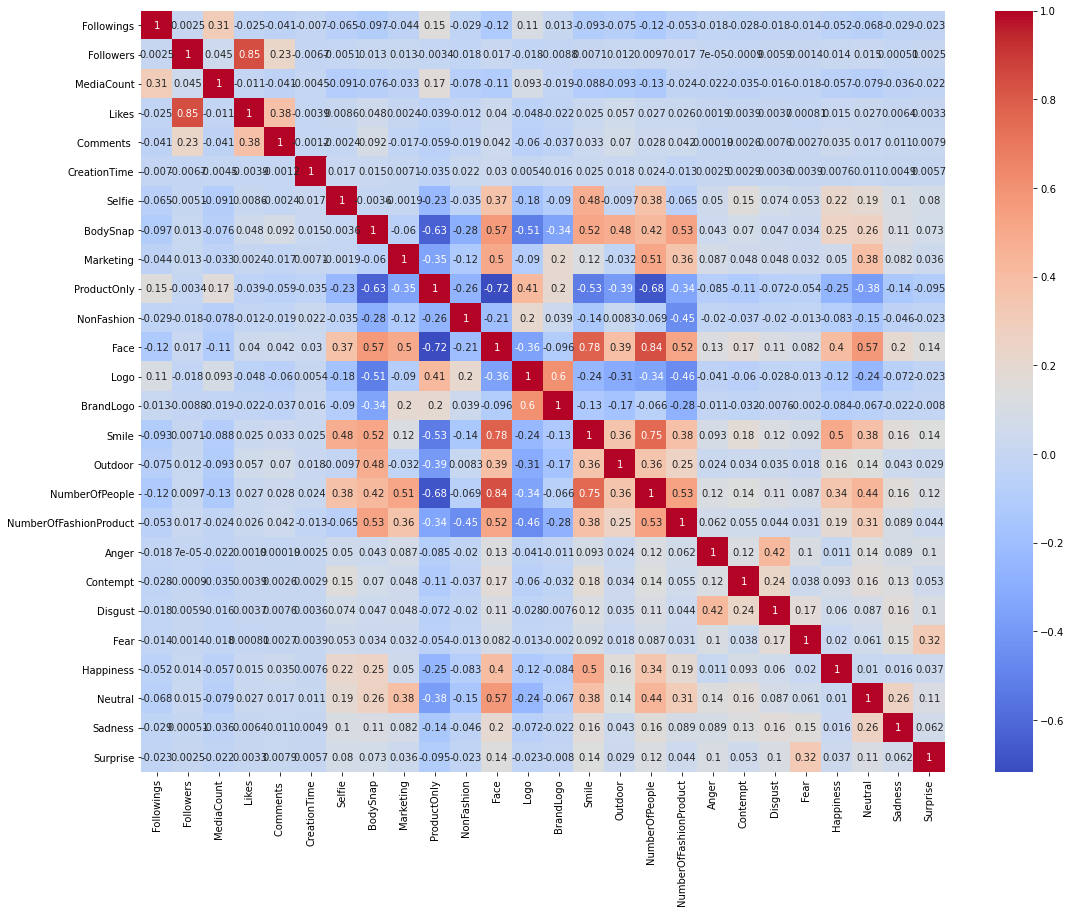

In [43]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Make heatmap of data
_= plt.figure(figsize=(18,14))
heatmap = sns.heatmap(fashion_df_clean.corr(), annot=True, cmap="coolwarm")
plt.show()

There is a 0.2 correlation between BrandLogo and Marketing and BrandLogo and ProductOnly. There is a 0.85 correlation between Followers and Likes. There is a 0.25 correlation between Outdoor and NumberofFashionProduct. There is a 0.38 correlation between Comments and Likes. From all the emotional states, there seems to be the highest correlation between Marketing and Neutral. There is a 0.34 correlation between happiness and NumberofPeople, but again the correlation is higher with Neutral and NumberofPeople. 

In [46]:
fashion_df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Followings,24752.0,1.711450e+03,3.440661e+03,0.000000e+00,2.350000e+02,5.860000e+02,1.934000e+03,1.276840e+05
Followers,24752.0,1.184976e+04,1.287056e+05,0.000000e+00,4.300000e+02,1.564000e+03,6.552000e+03,1.583129e+07
MediaCount,24752.0,3.461279e+03,6.514609e+03,0.000000e+00,3.200000e+02,9.040000e+02,2.931000e+03,6.285000e+04
Likes,24752.0,1.016221e+02,8.710111e+02,0.000000e+00,1.000000e+01,2.200000e+01,5.300000e+01,1.019220e+05
Comments,24752.0,2.776139e+00,1.415760e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.682000e+03
CreationTime,24752.0,1.452940e+09,9.626435e+06,0.000000e+00,1.453495e+09,1.453806e+09,1.453868e+09,1.454060e+09
Selfie,24752.0,3.436671e-02,1.298342e-01,5.950000e-12,5.384143e-04,2.083690e-03,7.383710e-03,9.913490e-01
BodySnap,24752.0,3.150808e-01,3.774539e-01,5.880000e-06,1.028587e-02,8.885570e-02,6.722453e-01,9.999810e-01
Marketing,24752.0,1.229773e-01,2.296240e-01,5.270000e-06,6.151755e-03,2.258790e-02,1.009300e-01,9.991170e-01
ProductOnly,24752.0,4.028897e-01,4.324519e-01,1.540000e-05,6.651667e-03,1.275765e-01,9.480013e-01,1.000000e+00


In [47]:
duplicateRowsDF = fashion_df_clean[fashion_df_clean.duplicated()]
duplicateRowsDF

,Followings,Followers,MediaCount,BrandName,BrandCategory,Likes,Comments,CreationTime,Selfie,BodySnap,...,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise,clean_hashtags,clean_caption
101,248.0,164.0,232,abercrombie,High street,18,2,1453849766,0.005003,0.014248,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,summer fashion love dustyrose trend blogg...,This real happening site...
121,451.0,4365.0,485,abercrombie,High street,115,3,1453841731,0.000473,0.002936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,fashion urbanoutfitters nordstorm nastygal ...,Cute U riverisland revolveclothing...
530,4998.0,4211.0,1293,acnestudios,Designer,29,0,1453816792,0.003060,0.018040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,milanotes acne acnestudios chloe chlo mi...,milanotes acne nAcne Studios ...
610,4998.0,4211.0,1293,acnestudios,Designer,21,3,1453825786,0.001515,0.083939,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,acnestudios chloe chlo milanotes celine ...,milanotes borsalino ...
2501,892.0,11421.0,2467,americaneagle,High street,782,10,1453869648,0.488653,0.093598,...,0.000145,0.000438,0.000031,0.000015,0.000138,0.996441,0.002374,0.000417,bleachmyfilm artofvisuals peoplescreatives ...,Proverbs nThe fear lays snare wh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24692,7395.0,2959.0,5230,zara,High street,1,0,1453884438,0.002344,0.133608,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,Sale ...
24740,7495.0,4224.0,5558,zara,High street,0,0,1453883083,0.001645,0.007993,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,siambrandname weloveshopping somethingboudoi...,U ...
24742,7495.0,4224.0,5558,zara,High street,0,0,1453883071,0.006585,0.008586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,siambrandname weloveshopping somethingboudoi...,U ...
24745,7495.0,4224.0,5558,zara,High street,0,0,1453883055,0.008367,0.014598,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,siambrandname weloveshopping somethingboudoi...,U ...


### Brand Name and Followers

In [48]:
# Making separate dataframe
brand_table = fashion_df_clean.pivot_table(index=['BrandCategory'], columns=['BrandName'], values=['Followers'], fill_value=0)
brand_table

Followers                                               \
BrandName     abercrombie   acnestudios alexandermcqueen alexanderwang   
BrandCategory                                                            
Designer          0.00000  17257.625373       20861.0625  24572.631206   
High street    3622.03125      0.000000           0.0000      0.000000   
Mega couture      0.00000      0.000000           0.0000      0.000000   
Small couture     0.00000      0.000000           0.0000      0.000000   

                                                                            \
BrandName     americanapparel americaneagle       brioni brunellocucinelli   
BrandCategory                                                                
Designer             0.000000      0.000000     0.000000          0.000000   
High street      18809.814815   6404.108108     0.000000          0.000000   
Mega couture         0.000000      0.000000     0.000000          0.000000   
Small couture        0.000000      0.000000  9254.104046      11983.029279   

                                       ...                               \
BrandName       burberry  calvinklein  ...       sandro stellamccartney   
BrandCategory                          ...                                
Designer          0.0000     0.000000  ...  9013.777397    17287.645548   
High street       0.0000  9742.481061  ...     0.000000        0.000000   
Mega couture   5772.6875     0.000000  ...     0.000000        0.000000   
Small couture     0.0000     0.000000  ...     0.000000        0.000000   

                                                                    \
BrandName           theory      tiffany       topshop       uniqlo   
BrandCategory                                                        
Designer       4699.995153     0.000000      0.000000     0.000000   
High street       0.000000     0.000000  10595.785311  3601.502836   
Mega couture      0.000000  6213.894737      0.000000     0.000000   
Small couture     0.000000     0.000000      0.000000     0.000000   

                                                                           
BrandName     urbanoutfitters        vince viviennewestwood          zara  
BrandCategory                                                              
Designer             0.000000  9414.460847      3239.185714      0.000000  
High street       9800.709531     0.000000         0.000000  10145.044037  
Mega couture         0.000000     0.000000         0.000000      0.000000  
Small couture        0.000000     0.000000         0.000000      0.000000  

[4 rows x 48 columns]

In [52]:
brand_name_followers = fashion_df_clean[['Followers','BrandName']]
brand_name_followers

,Followers,BrandName
0,9840.0,abercrombie
1,2300.0,abercrombie
2,605.0,abercrombie
3,605.0,abercrombie
4,456.0,abercrombie
...,...,...
24747,3236.0,zara
24748,2563.0,zara
24749,8737.0,zara
24750,8737.0,zara


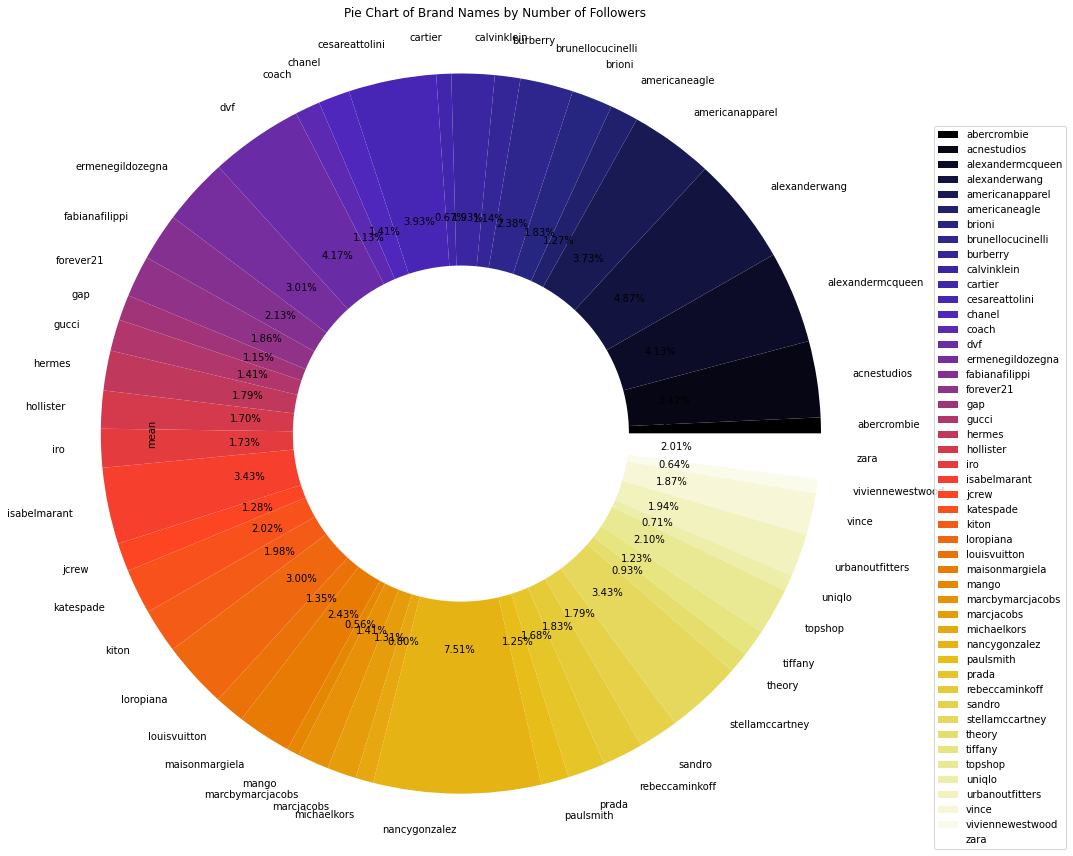

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pie chart for Brand Names by Followers
brand_name_followers_pie = brand_name_followers.groupby(brand_name_followers['BrandName']).agg(['mean'])
pie = brand_name_followers_pie.Followers.plot.pie(
    subplots =True,
    figsize=(16,12), 
    radius= 1.5, 
    autopct='%0.2f%%',
    cmap='CMRmap',
    title ='Pie Chart of Brand Names by Number of Followers')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.tight_layout()
plt.show()

### Brand Name and Marketing

In [56]:
brand_name_market = fashion_df_clean[['BrandName','Marketing']]
brand_name_market

,BrandName,Marketing
0,abercrombie,0.741220
1,abercrombie,0.001728
2,abercrombie,0.025719
3,abercrombie,0.025719
4,abercrombie,0.028351
...,...,...
24747,zara,0.010261
24748,zara,0.003330
24749,zara,0.057724
24750,zara,0.057724


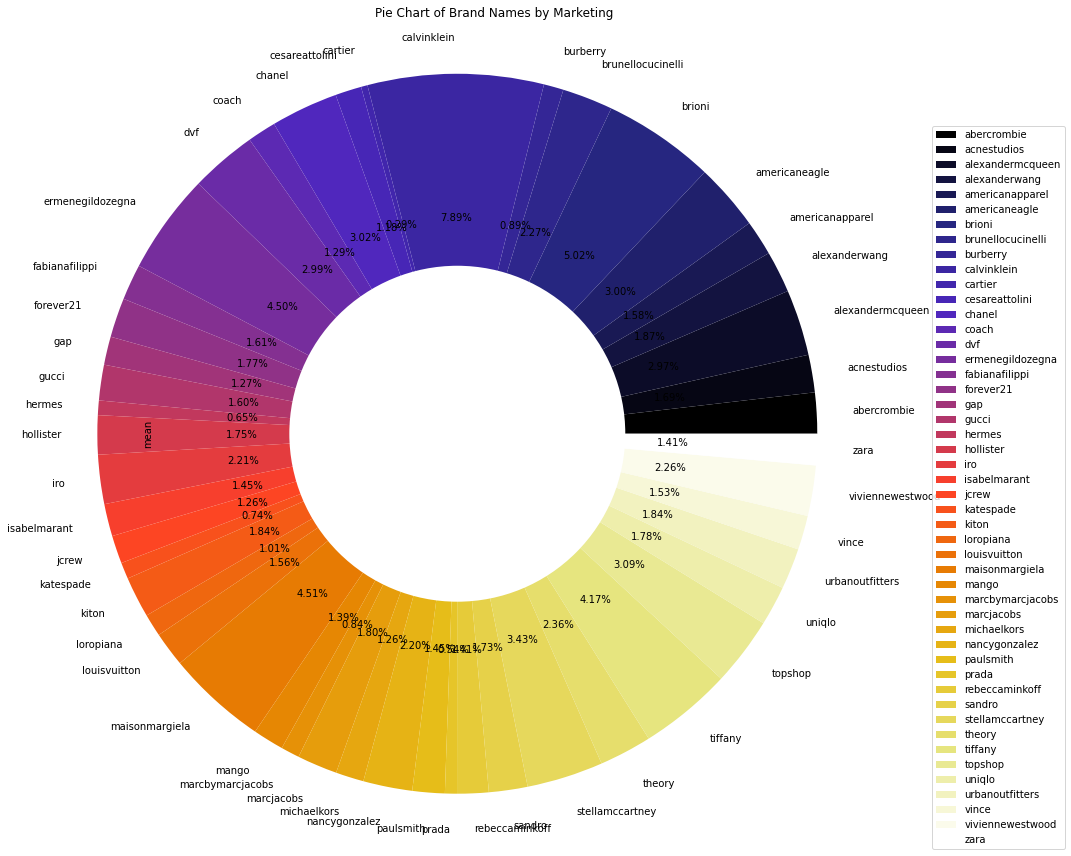

In [71]:
# Pie chart for Brand Names and Marketing
brand_name_market_pie = brand_name_market.groupby(brand_name_market['BrandName']).agg(['mean'])
market_pie = brand_name_market_pie.Marketing.plot.pie(
    subplots =True,
    figsize=(16,12), 
    radius= 1.5, 
    autopct='%0.2f%%',
    cmap='CMRmap',
    title ='Pie Chart of Brand Names by Marketing')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.tight_layout()
plt.show()

### Brand Name and Media Count

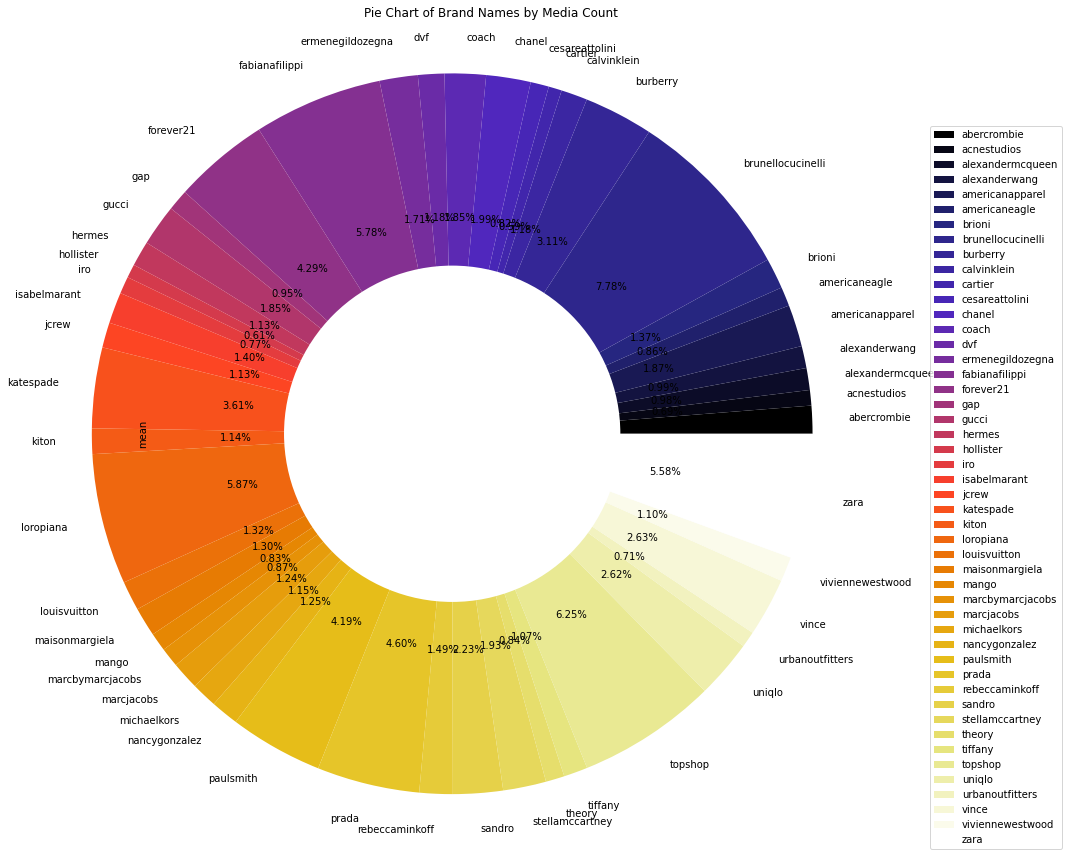

In [72]:
# Pie chart for Brand Names and Media Count
brand_name_media_count_pie = fashion_df_clean.groupby(fashion_df_clean['BrandName']).agg(['mean'])
media_count_pie = brand_name_media_count_pie.MediaCount.plot.pie(
    subplots =True,
    figsize=(16,12), 
    radius= 1.5, 
    autopct='%0.2f%%',
    cmap='CMRmap',
    title ='Pie Chart of Brand Names by Media Count')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.tight_layout()
plt.show()

### Brand Name and Likes

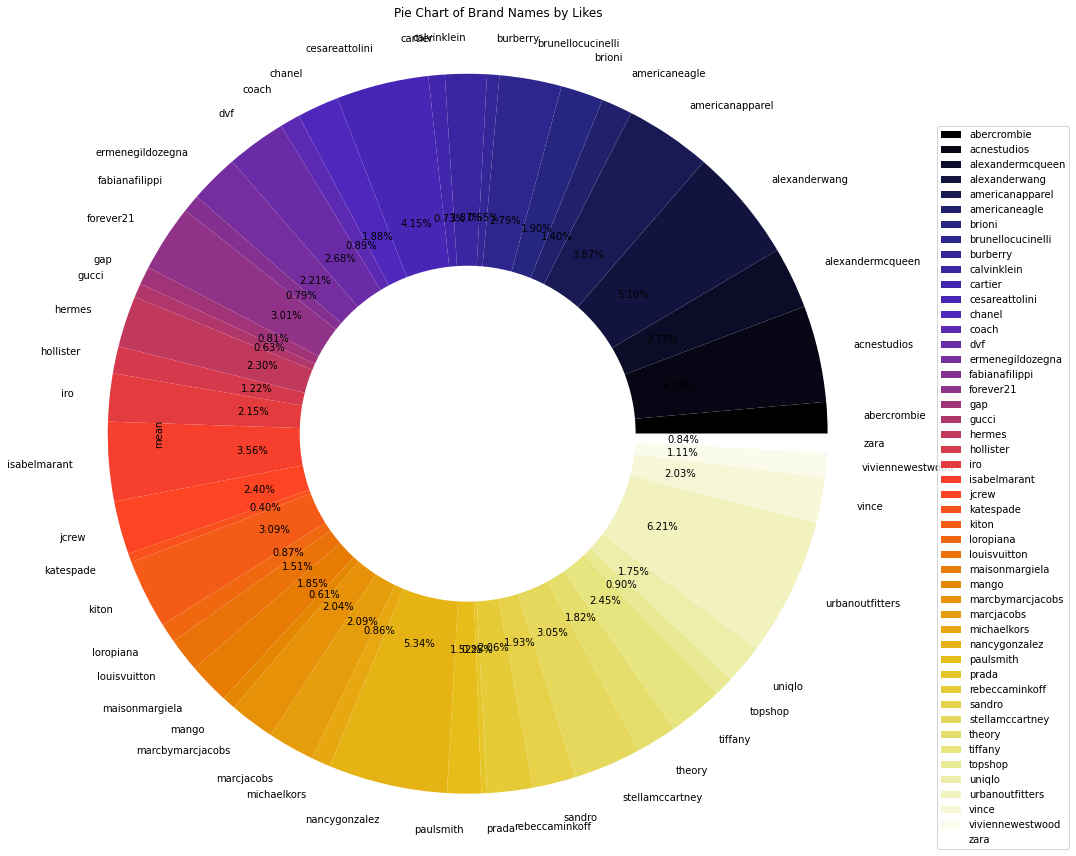

In [73]:
# Pie chart for Brand Names and Likes
brand_name_likes_pie = fashion_df_clean.groupby(fashion_df_clean['BrandName']).agg(['mean'])
likes_pie = brand_name_likes_pie.Likes.plot.pie(
    subplots =True,
    figsize=(16,12), 
    radius= 1.5, 
    autopct='%0.2f%%',
    cmap='CMRmap',
    title ='Pie Chart of Brand Names by Likes')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.tight_layout()
plt.show()